# Exploratory Data Analysis

### We'll perform some exploratory data analysis on the dataset, and plot some graphs to gain insights into the data

importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from typing import Counter
%matplotlib inline


In [2]:
# Surpress warnings:
# import warnings
# def warn(*args, **kwargs):
#     pass
# warnings.warn = warn

Importing the datasets
* train40features.csv contains the feature extracted data without the target variable
* train.csv contains the raw data without features and the target variable


In [3]:
df = pd.read_csv('train40Features.csv')
target = pd.read_csv('train.csv')

In [4]:
df

,sex,age_approx,anatom_site_general_challenge,V1,V2,V3,V4,V5,V6,V7,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,3,45.0,2,0.1024,9,8789.0625,84.667969,147,1435.546875,2.148438,...,1.835102,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426
1,2,45.0,7,0.1024,5,4882.8125,84.570312,88,859.375000,1.687500,...,1.301577,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091
2,2,50.0,3,0.1024,6,5859.3750,84.960938,100,976.562500,1.781250,...,1.475337,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386
3,2,45.0,2,0.1024,15,14648.4375,84.765625,210,2050.781250,2.640625,...,2.772424,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073
4,2,55.0,7,0.1024,6,5859.3750,84.667969,98,957.031250,1.765625,...,1.358362,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,3,50.0,6,0.1024,7,6835.9375,84.960938,85,830.078125,1.664062,...,1.263983,1.285714,0.400000,0.156775,12.671240,1.151403,0.167951,0.064212,58.446614,0.423386
33122,3,65.0,6,0.1024,3,2929.6875,84.375000,93,908.203125,1.726562,...,1.358186,2.263158,1.330508,0.579507,29.304283,1.289848,0.386165,0.172430,57.495611,0.433399
33123,3,20.0,3,0.1024,5,4882.8125,84.472656,100,976.562500,1.781250,...,1.396926,1.271186,1.571429,0.619132,38.465563,1.243242,0.434049,0.184970,56.832079,0.431748
33124,3,50.0,3,0.1024,5,4882.8125,82.812500,117,1142.578125,1.914062,...,1.538642,1.440678,1.437500,0.568802,34.150972,1.267661,0.363322,0.163512,52.978737,0.458847


We can see that the data is the already numerically encoded, as this was a preprocessed data. 

In [5]:
target

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


We can see that this dataset is not numerically encoded and it contains the target variable.<br>
 It also contains the image name and the patient id which we will not use for training. <br>
 This dataset was for image training the data, which we will not use as it is out of our scope so we will simply use the extracted features dataset.

We will now combine the two datasets to get the final dataset for training.

In [6]:
#adding target column to our train dataset
df['diagnosis']= target['diagnosis']
df['target'] = target['target']

dropping the V1 column as it has all the same values

In [7]:
df.drop('V1',axis = 1, inplace = True) 

Renaming the dataset columns for better understanding

In [8]:
columns = ['sex','age','anatomy','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34','V35','V36','diagnosis','target']
df.columns = columns
df.head()

,sex,age,anatomy,V1,V2,V3,V4,V5,V6,V7,...,V29,V30,V31,V32,V33,V34,V35,V36,diagnosis,target
0,3,45.0,2,9,8789.0625,84.667969,147,1435.546875,2.148438,0.074062,...,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426,unknown,0
1,2,45.0,7,5,4882.8125,84.570312,88,859.375000,1.687500,0.074457,...,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091,unknown,0
2,2,50.0,3,6,5859.3750,84.960938,100,976.562500,1.781250,0.074682,...,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386,nevus,0
3,2,45.0,2,15,14648.4375,84.765625,210,2050.781250,2.640625,0.075285,...,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073,unknown,0
4,2,55.0,7,6,5859.3750,84.667969,98,957.031250,1.765625,0.074475,...,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426,unknown,0


checking the target variable counts

In [9]:
df['target'].value_counts()

target
0    32542
1      584
Name: count, dtype: int64

we can see that this is a hugely imbalanced dataset, so we will have to deal with that later.

converting some of the numerically coded variables back to categorical variables for better EDA

In [10]:
df_cat = df.copy()
df_cat['sex'].replace({3:'Male', 2:'Female', 1:'Unknown'}, inplace = True)
df_cat['anatomy'].replace({7:'upper extremity', 2:'head/neck', 3:'lower extremity', 6:'torso',
                           1:'palm/soles', 5:'oral/genital', 4:'unknown'}, inplace = True)
df_cat.head()

,sex,age,anatomy,V1,V2,V3,V4,V5,V6,V7,...,V29,V30,V31,V32,V33,V34,V35,V36,diagnosis,target
0,Male,45.0,head/neck,9,8789.0625,84.667969,147,1435.546875,2.148438,0.074062,...,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426,unknown,0
1,Female,45.0,upper extremity,5,4882.8125,84.570312,88,859.375000,1.687500,0.074457,...,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091,unknown,0
2,Female,50.0,lower extremity,6,5859.3750,84.960938,100,976.562500,1.781250,0.074682,...,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386,nevus,0
3,Female,45.0,head/neck,15,14648.4375,84.765625,210,2050.781250,2.640625,0.075285,...,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073,unknown,0
4,Female,55.0,upper extremity,6,5859.3750,84.667969,98,957.031250,1.765625,0.074475,...,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426,unknown,0


#### Checking the no of missing values in the dataset

In [11]:
df.isnull().sum()

sex          0
age          0
anatomy      0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
V30          0
V31          0
V32          0
V33          0
V34          0
V35          0
V36          0
diagnosis    0
target       0
dtype: int64

In [12]:
target.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

We can see that the train.csv dataset had some features, which was removed during the feature extraction process and hence we havea dataset train40features.csv with no missing values.

#### Checking Age Counts

In [13]:
df_cat['sex'].value_counts()

sex
Male       17080
Female     15981
Unknown       65
Name: count, dtype: int64

#### Checking Anatomy Counts

In [14]:
df_cat['anatomy'].value_counts()

anatomy
torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palm/soles           527
oral/genital         375
unknown              124
Name: count, dtype: int64

#### Checking Diagnosis Counts

In [15]:
df['diagnosis'].value_counts()

diagnosis
unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: count, dtype: int64

In [16]:
df['age'].value_counts()

age
45.000000    4466
50.000000    4270
55.000000    3824
40.000000    3576
60.000000    3240
35.000000    2850
65.000000    2527
30.000000    2358
70.000000    1968
25.000000    1544
75.000000     981
20.000000     655
80.000000     419
85.000000     149
15.000000     132
90.000000      80
48.870016      68
10.000000      17
0.000000        2
Name: count, dtype: int64

#### converting age into int as there was a float value which was probably the mean of the ages, which was inserted in place of the missing values.

In [17]:
df = df.astype({'age': 'int'})
df['age'].value_counts()


age
45    4466
50    4270
55    3824
40    3576
60    3240
35    2850
65    2527
30    2358
70    1968
25    1544
75     981
20     655
80     419
85     149
15     132
90      80
48      68
10      17
0        2
Name: count, dtype: int64

## Gender Distribution

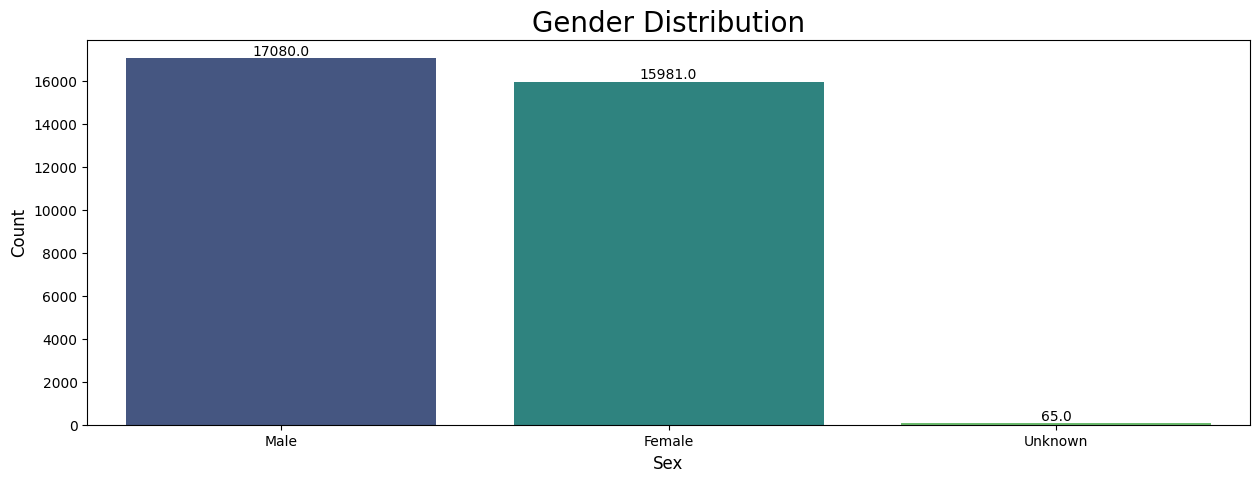

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
splot= sns.countplot(data=df_cat, x='sex', ax=ax, palette='viridis')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.0, p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_title('Gender Distribution', fontsize=20)
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

We can see that the males are females are almost equally distributed in the dataset.

## Age distribution

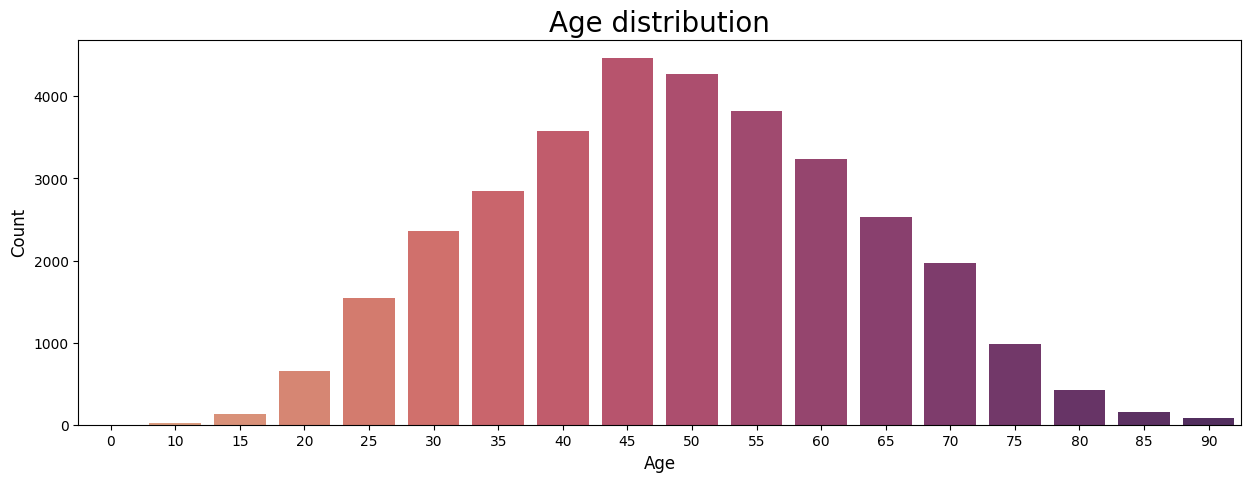

In [19]:
x= df[df['age']!=48]
fig, ax= plt.subplots(figsize=(15,5))
sns.countplot(x=x['age'], palette="flare", ax=ax)
ax.set_title("Age distribution", fontsize=20)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()


the age distribution is almost normal with a slight right skew, the modal age is around 45-50 years.

## Age distribution with Genders

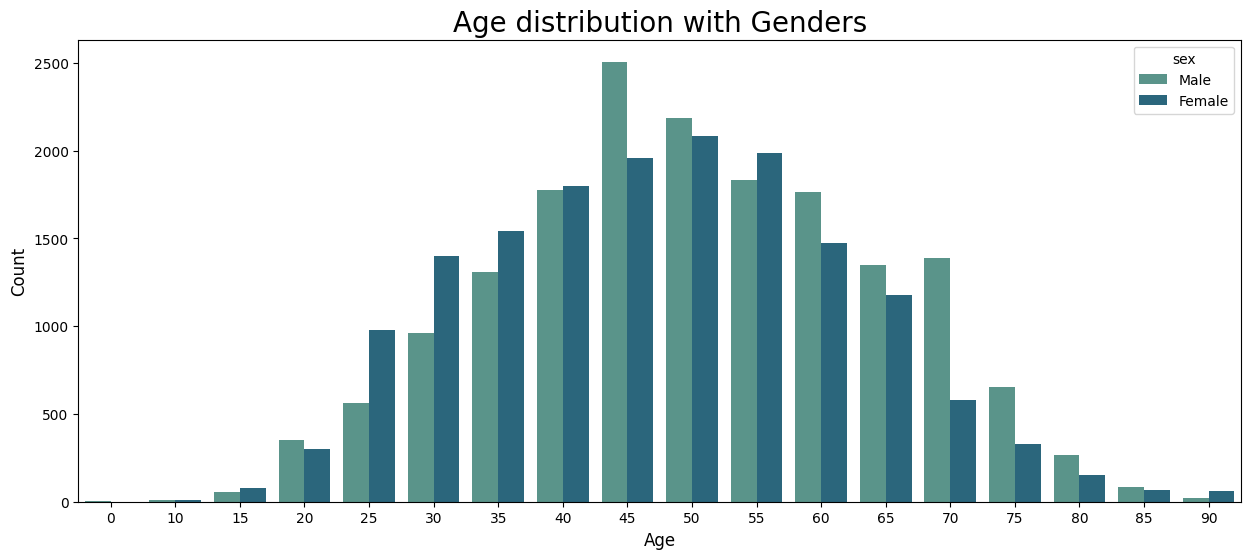

In [20]:
#ages acc to gender
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x,x=x['age'], hue=df_cat[df_cat['sex']!='Unknown'].sex, palette="crest")
ax.set_title("Age distribution with Genders", fontsize=20)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()


* We can see that for ages<40, and for age =55 the female count is more.
* Both the female and the male age distributions are normal distributions. 

## Age distribution with Gender and Target

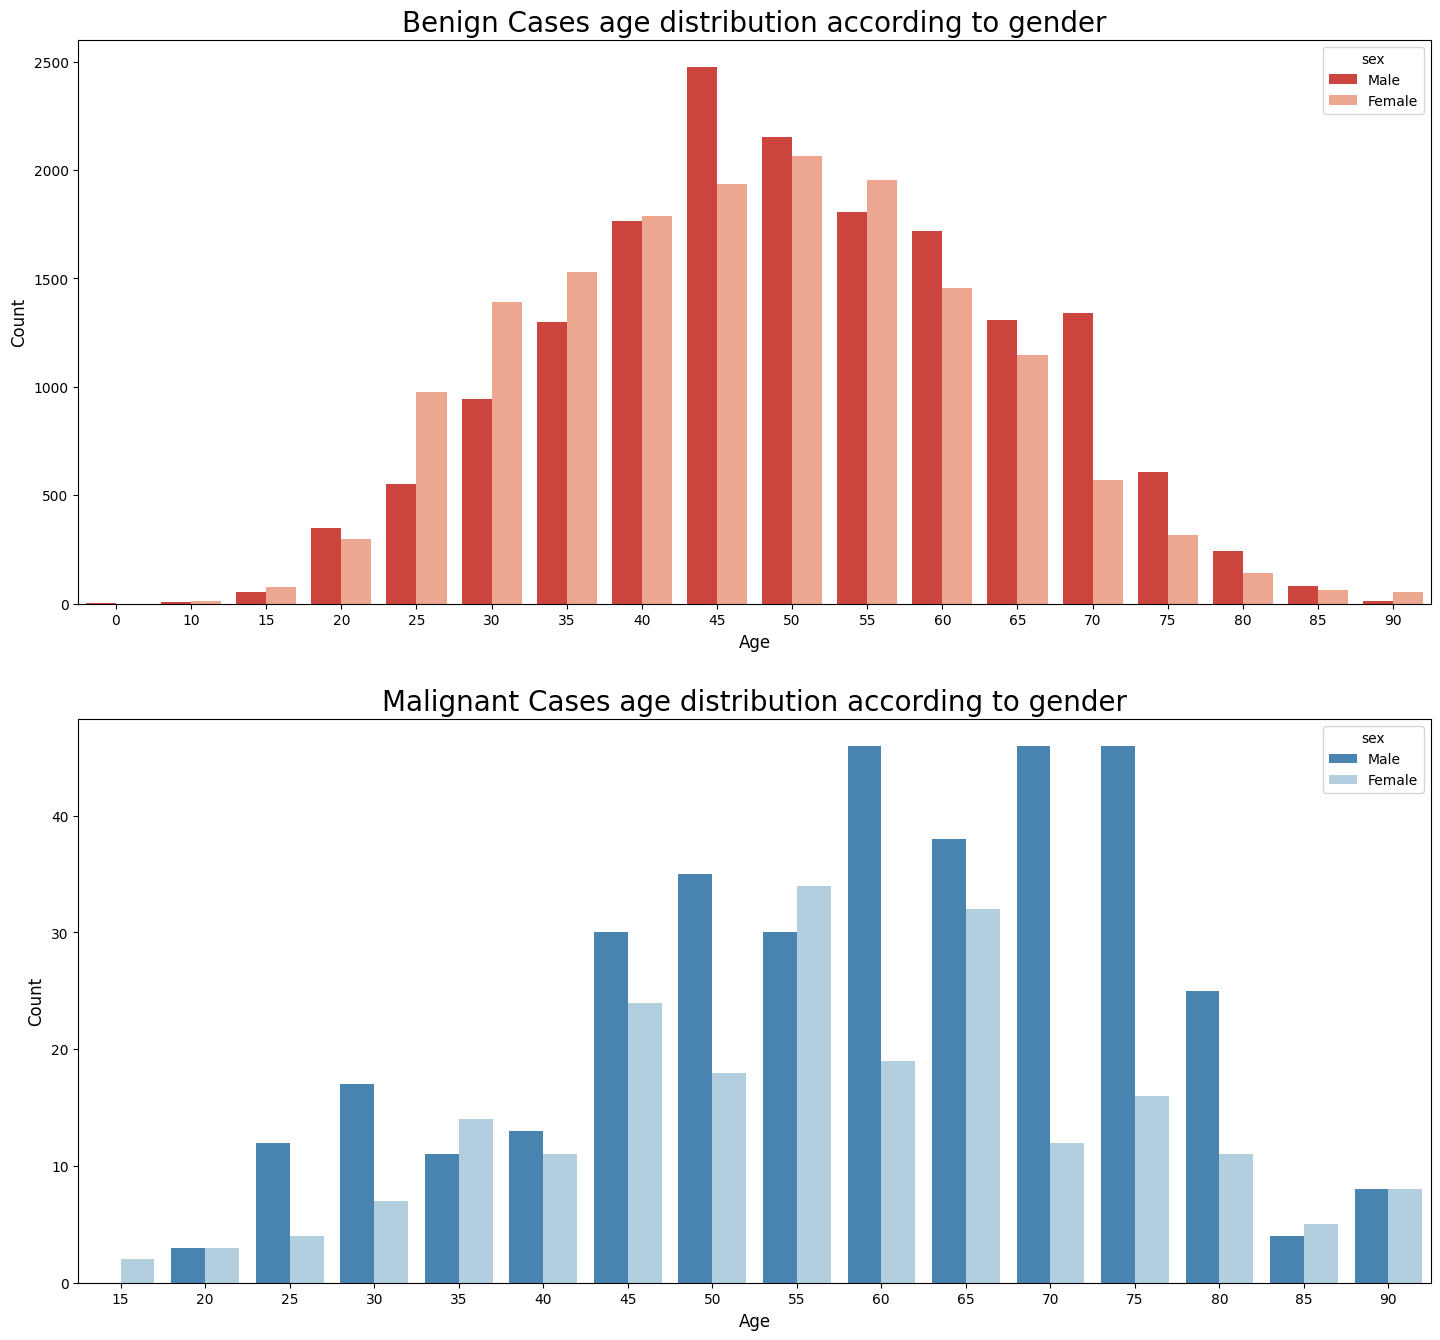

In [21]:
fig, ax = plt.subplots(2,1,figsize=(15,14))
sns.countplot(x, x= x[x.target==0].age, hue=df_cat[df_cat['sex']!='Unknown'].sex, palette="Reds_r", ax=ax[0])
ax[0].set_title("Benign Cases age distribution according to gender", fontdict={'fontsize': 20})
sns.countplot(x, x=x[x.target == 1].age, hue=df_cat[df_cat['sex']!= 'Unknown'].sex, palette="Blues_r", ax=ax[1])
ax[1].set_title("Malignant Cases age distribution according to gender", fontdict={'fontsize': 20})
fig.tight_layout(pad=3.0)
ax[0].set_xlabel("Age", fontdict={'fontsize': 12})
ax[0].set_ylabel("Count", fontdict={'fontsize': 12})
ax[1].set_xlabel("Age", fontdict={'fontsize': 12})
ax[1].set_ylabel("Count", fontdict={'fontsize': 12})
plt.show()


We can observe that males in general have a higher malignant count across almost all age groups.

## Anatomy Site Distribution

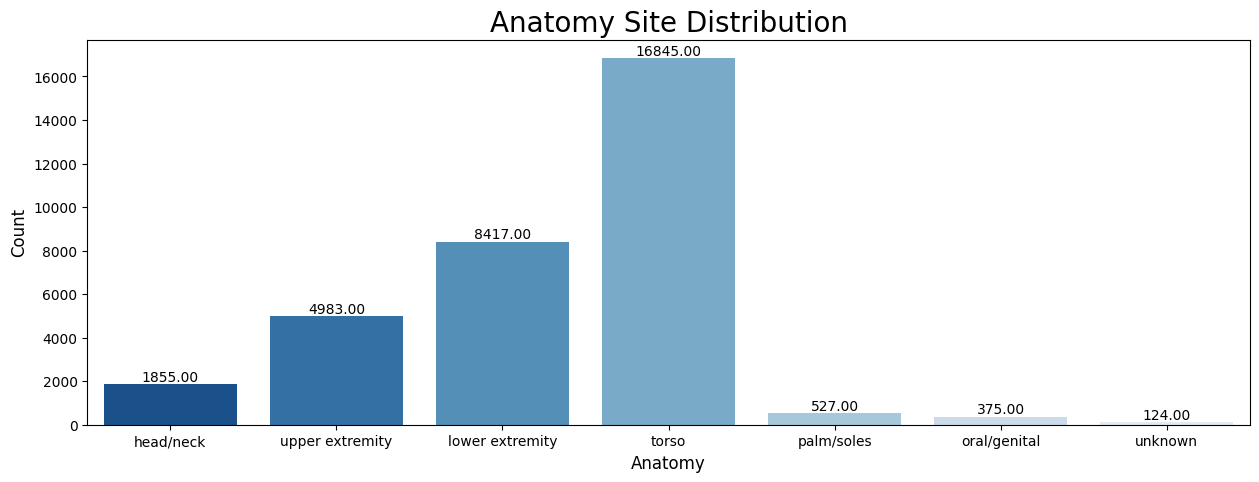

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
splot = sns.countplot(data=df_cat, x='anatomy', ax=ax, palette='Blues_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.0, p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
splot.set_title('Anatomy Site Distribution', fontdict={'fontsize': 20})
ax.set_xlabel("Anatomy", fontdict={'fontsize': 12})

ax.set_ylabel("Count", fontdict={'fontsize': 12})
plt.show()


Most of the images are of the torso, followed by the lower extremity.

## Anatomy Site Distribution with Gender

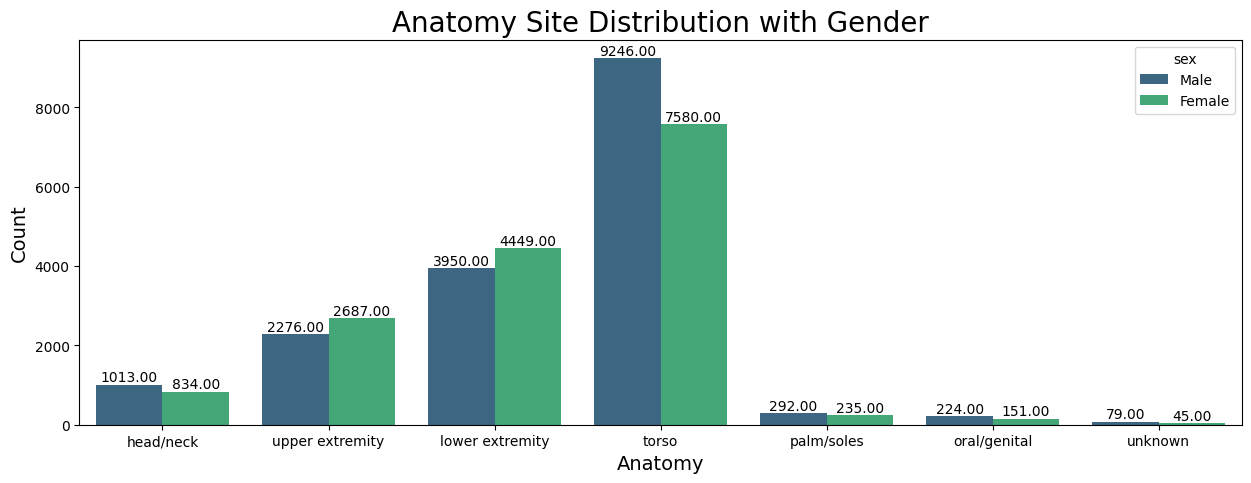

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
splot = sns.countplot(data=df_cat[df_cat['sex'] != 'Unknown'], x='anatomy',
                      hue=df_cat[df_cat['sex'] != 'Unknown'].sex, ax=ax, palette='viridis')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.0, p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
splot.set_title('Anatomy Site Distribution with Gender', fontdict={'fontsize': 20})
ax.set_xlabel("Anatomy", fontdict={'fontsize': 14})
ax.set_ylabel("Count", fontdict={'fontsize': 14})
plt.show()


We can see that except for cases detected for the torso site, the sex distribution for other cases is almost equal.

## Target Distribution for anatomy site and gender

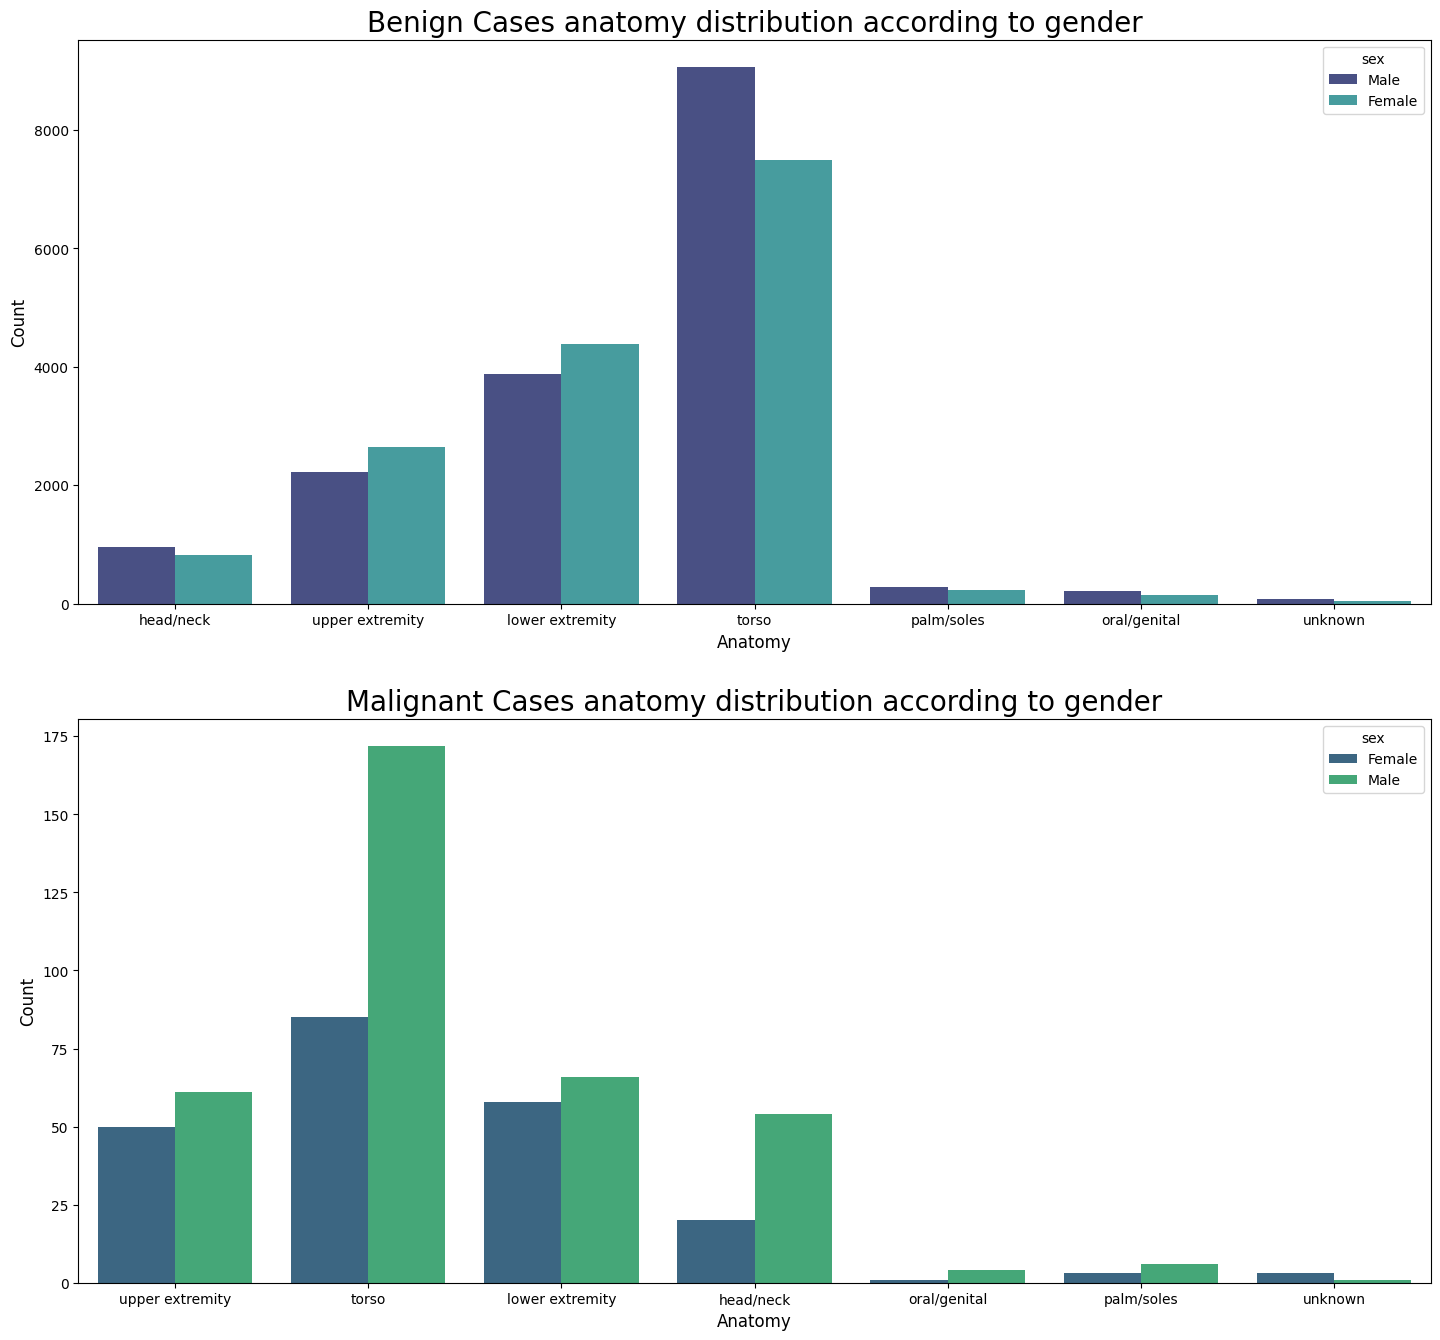

In [24]:
dfm = df_cat[df_cat['sex'] != 'Unknown']
dfmb=dfm[dfm['target']==0]
dfmm=dfm[dfm['target']==1]
fig, ax = plt.subplots(2, 1, figsize=(15, 14))
sns.countplot(dfmb, x=dfmb.anatomy, hue=dfmb.sex, palette="mako", ax=ax[0])
ax[0].set_title("Benign Cases anatomy distribution according to gender",
                fontdict={'fontsize': 20})
sns.countplot(dfmm, x=dfmm.anatomy, hue=dfmm.sex, palette="viridis", ax=ax[1])
ax[1].set_title("Malignant Cases anatomy distribution according to gender",
                fontdict={'fontsize': 20})
fig.tight_layout(pad=3.0)
ax[0].set_xlabel("Anatomy", fontdict={'fontsize': 12})
ax[0].set_ylabel("Count", fontdict={'fontsize': 12})
ax[1].set_xlabel("Anatomy", fontdict={'fontsize': 12})
ax[1].set_ylabel("Count", fontdict={'fontsize': 12})
plt.show()


* The most malignant cases are of the torso, followed by the lower extremity which is not surprising as these are the most common sites for melanoma. 
* The genders are almost equally distributed for all the anatomy sites except for torso and head/neck where malignant cases in males are significantly higher than that of the females

## Diagnosis Distribution

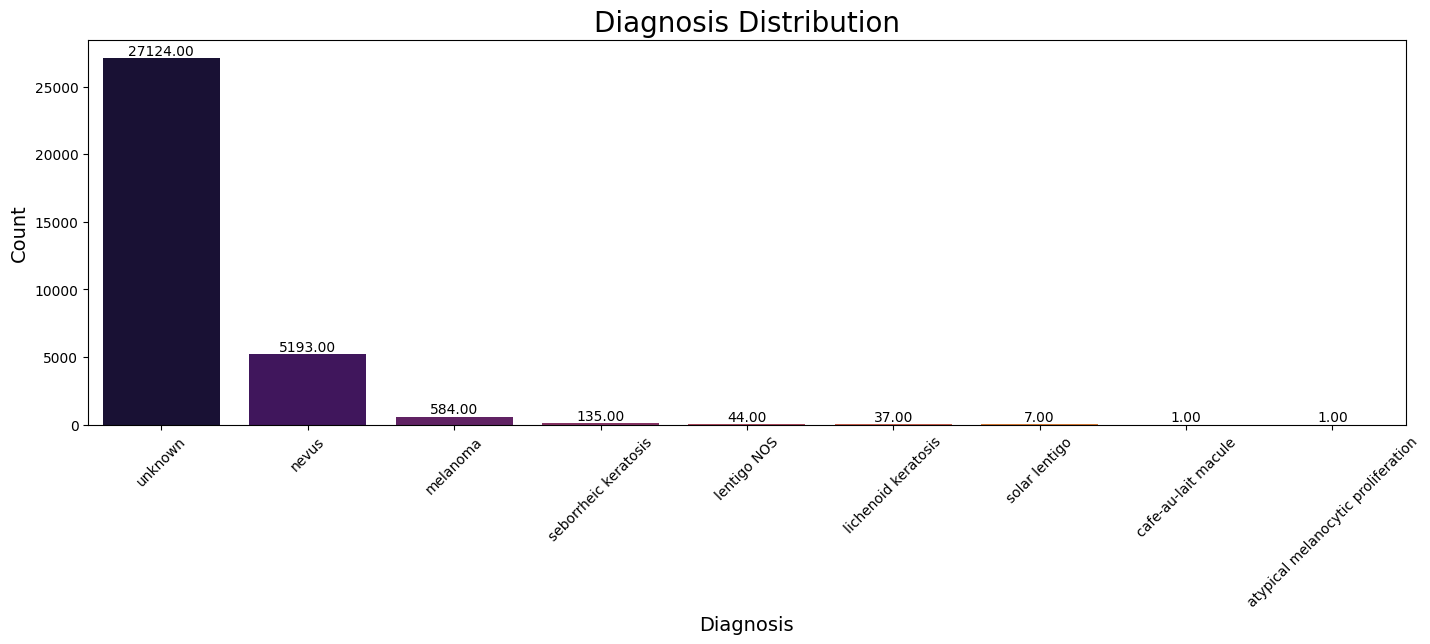

In [25]:
fig, ax = plt.subplots(figsize=(17, 5))
splot = sns.countplot(data=df_cat, x='diagnosis', ax=ax, palette='inferno')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.0, p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
splot.set_title('Diagnosis Distribution', fontdict={'fontsize': 20})
ax.set_xlabel("Diagnosis", fontdict={'fontsize': 14})
ax.set_ylabel("Count", fontdict={'fontsize': 14})
plt.xticks(rotation=45)
plt.show()


* For most patients, the diagnosis is unknown, but there are ~ 17% that have some kind of diagnosis available.
* The diagnosis is unknown and for those known we observe a very high imbalance.
*  Most likely we can't expect much from this additional target feature.

## Diagnosis Distribution with Gender

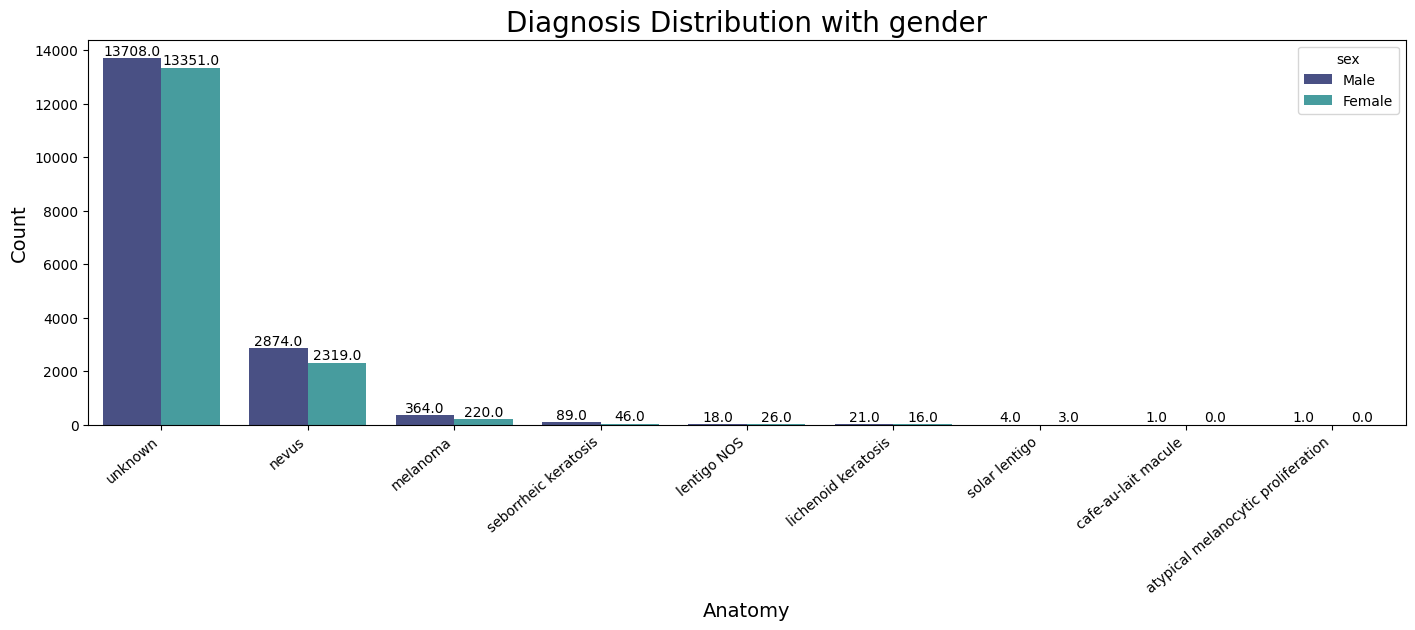

In [26]:
fig, ax = plt.subplots(figsize=(17, 5))
splot = sns.countplot(data=df_cat[df_cat['sex'] != 'Unknown'], x='diagnosis', hue=df_cat[df_cat['sex'] != 'Unknown'].sex,ax=ax, palette='mako')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.0, p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
splot.set_title('Diagnosis Distribution with gender', fontdict={'fontsize': 20})
ax.set_xlabel("Anatomy", fontdict={'fontsize': 14})
ax.set_ylabel("Count", fontdict={'fontsize': 14})
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.xticks(rotation=45)
plt.show()


we can see that the diagnosis is almost equally distributed for both males and females.

## Correlation Matrix

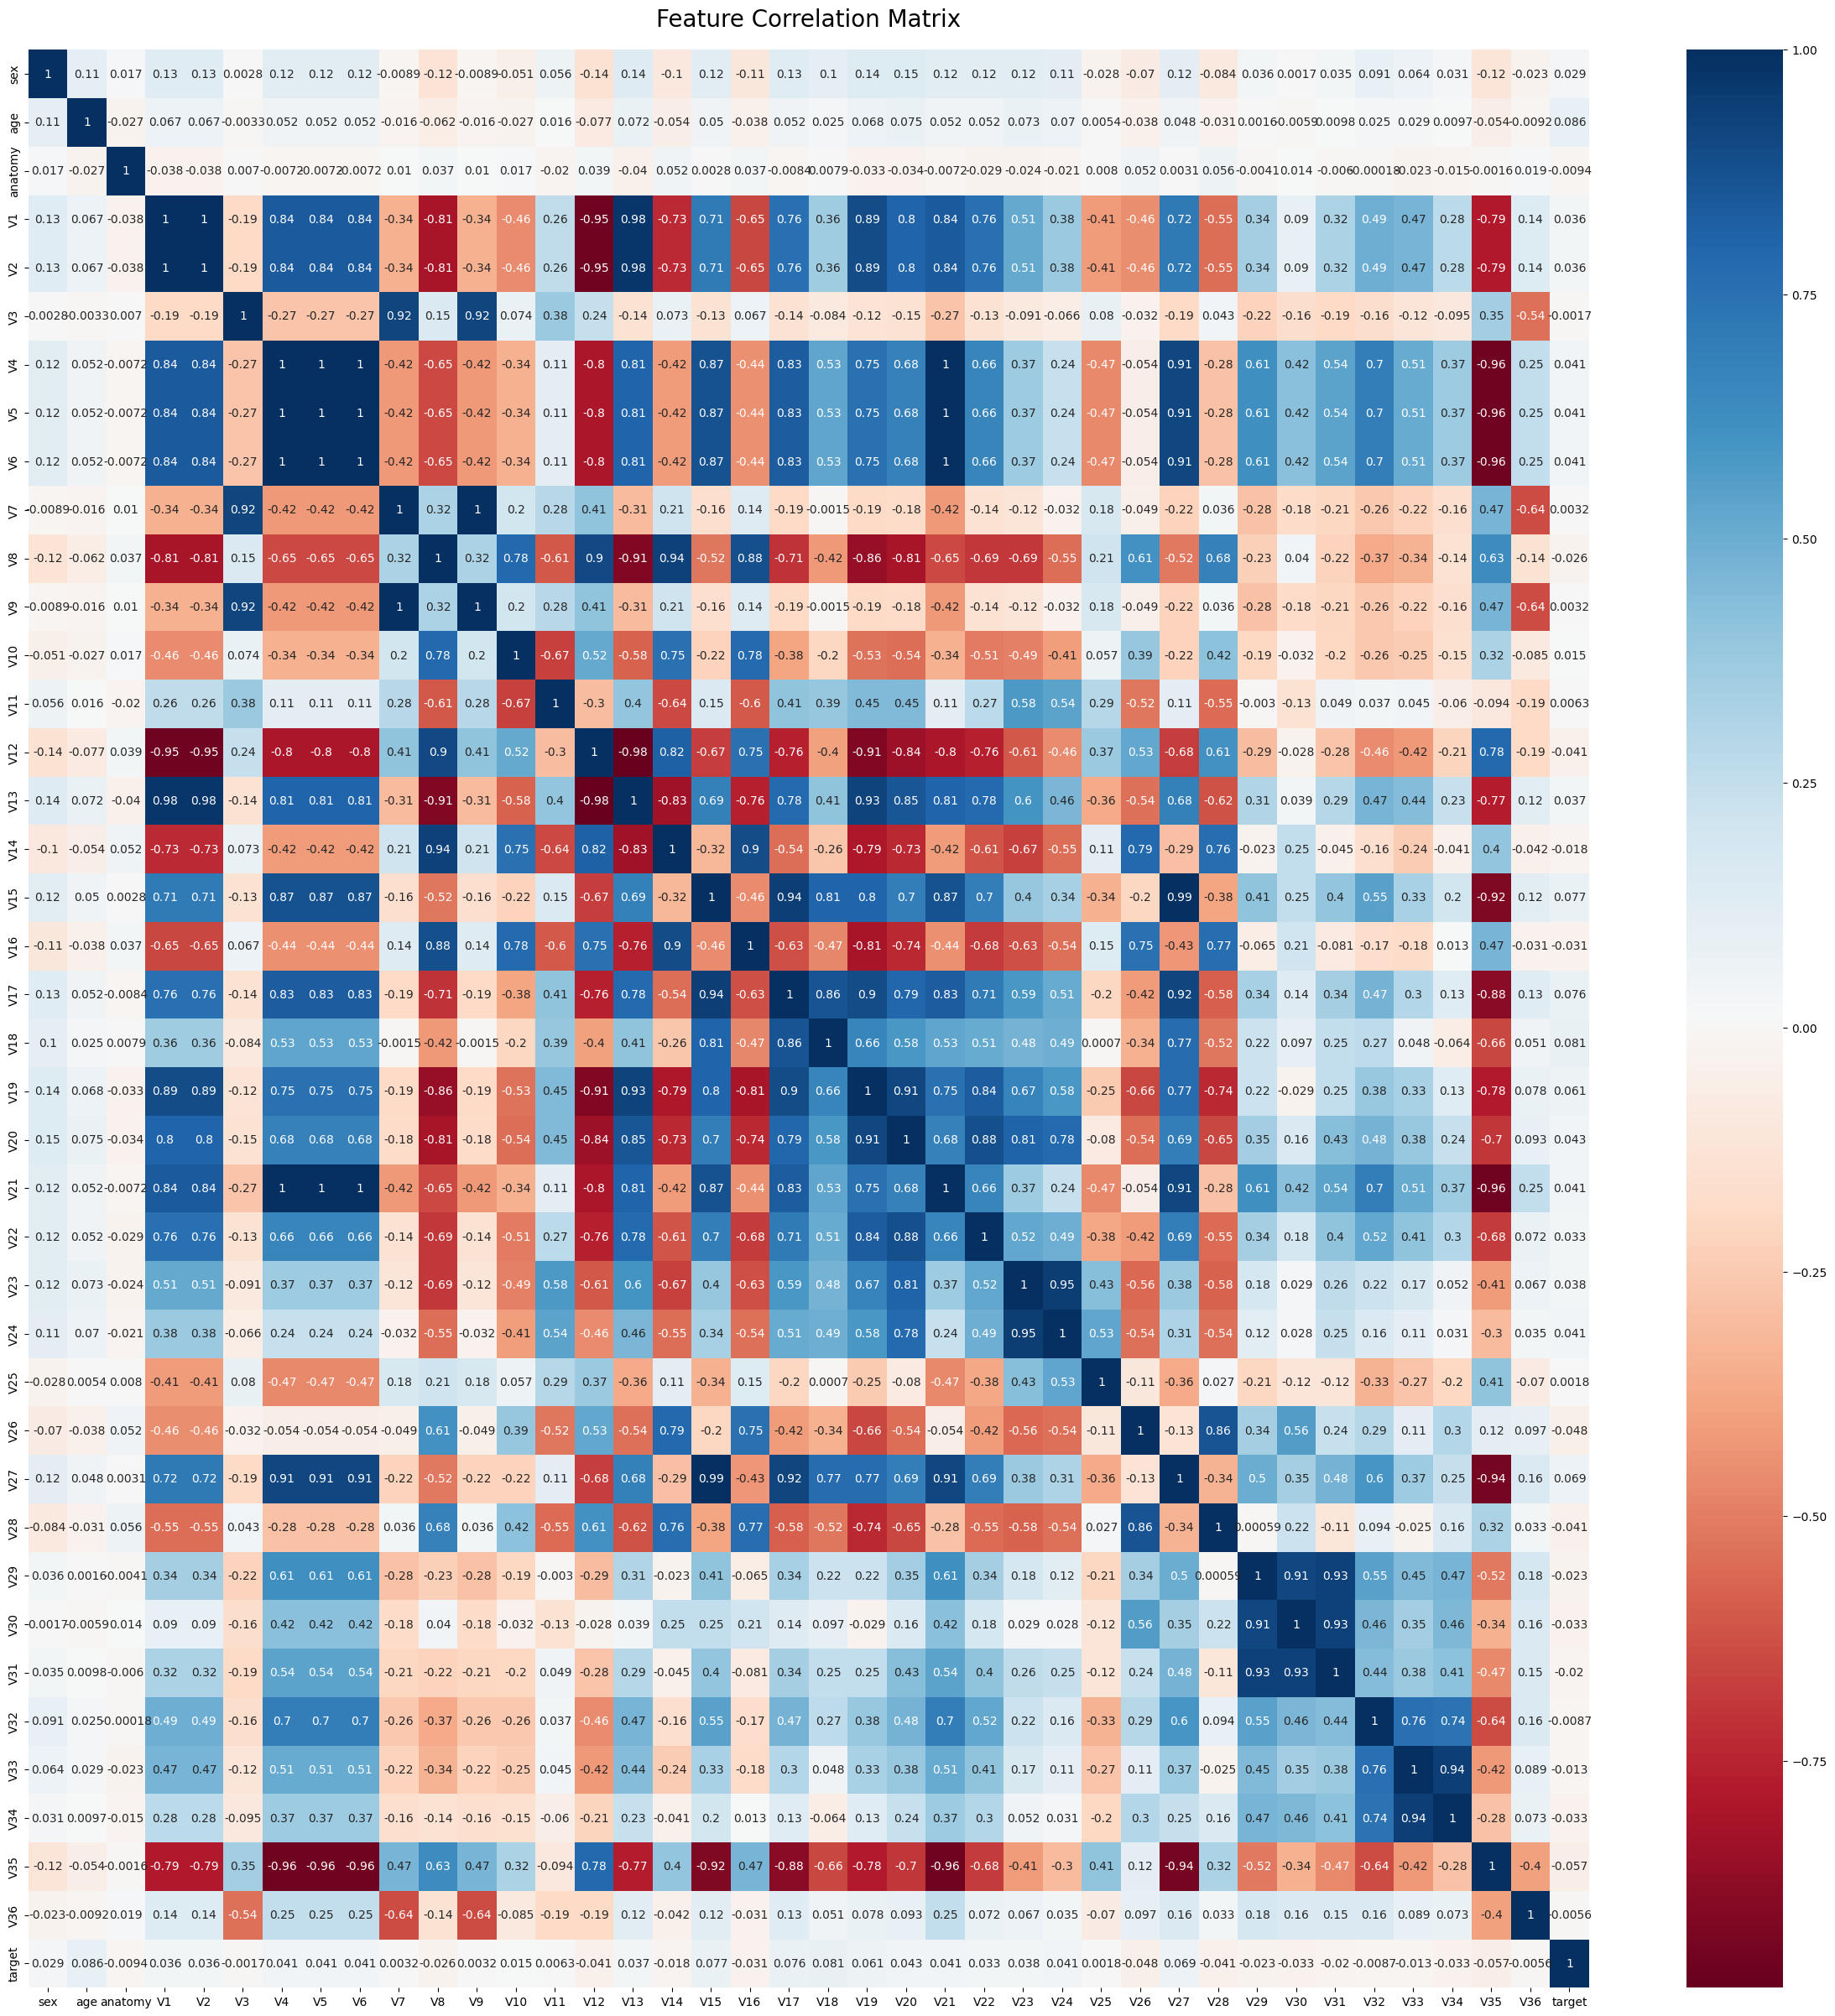

In [27]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data=df.drop('diagnosis', axis=1).corr(), ax=ax, annot=True,cmap='RdBu')
ax.set_title('Feature Correlation Matrix', fontdict = {'fontsize':20}, pad=20)
plt.show()

## Correlation with The Target Variable

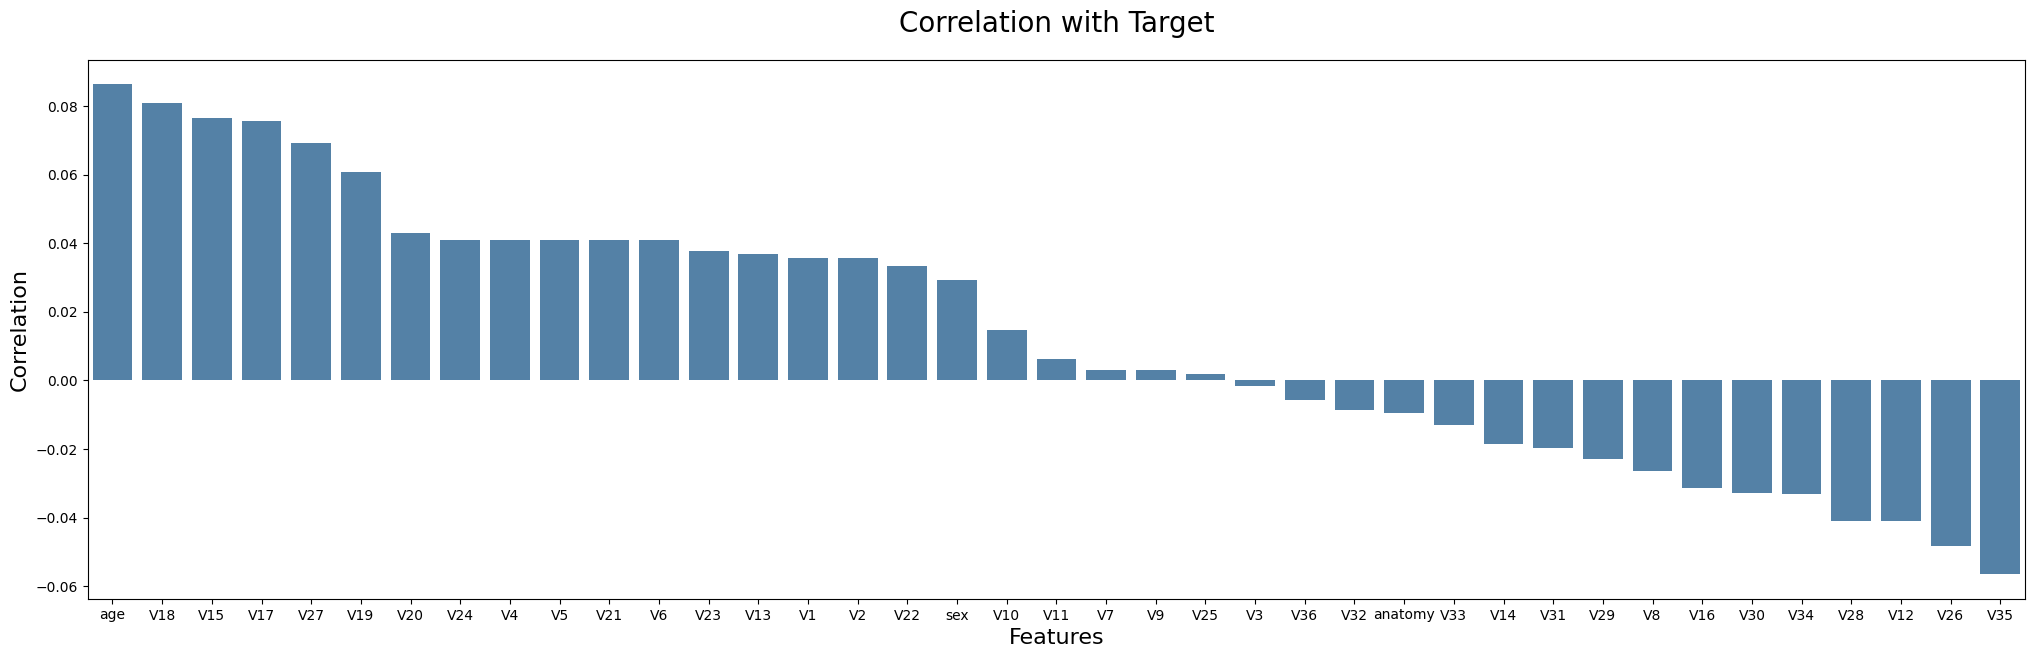

In [28]:
corr_matrix = df.drop('diagnosis', axis=1).corr().iloc[:-1, -1]
sorted_corr = corr_matrix.sort_values(ascending=False)
plt.figure(figsize=(25, 7))
sns.barplot(y=sorted_corr.values, x=sorted_corr.index, color='steelblue')
plt.title('Correlation with Target', fontdict = {'fontsize':20}, pad=20)
plt.ylabel('Correlation', fontsize = 16)
plt.xlabel('Features', fontsize = 16)
plt.show()

## Target Distribution

In [29]:
df['target'].value_counts()

target
0    32542
1      584
Name: count, dtype: int64

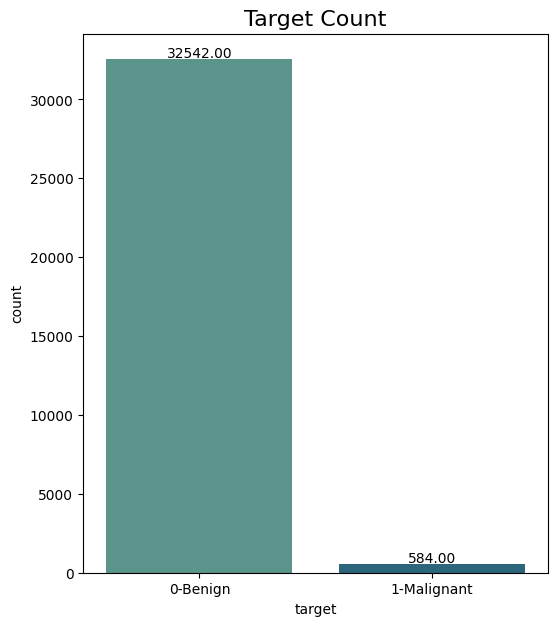

In [32]:
plt.figure(figsize=(6, 7))
splot = sns.countplot(data=df, x='target', palette='crest')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.0, p.get_height()),
               ha='center', va='center', xytext=(0, 4), textcoords='offset points')
splot.set_title('Target Count', fontdict = {'fontsize':16})
splot.set_xticklabels(['0-Benign', '1-Malignant'])
plt.show()


We can see that there is a ```huge class imbalance``` in the dataset. ```The minority:majority class ratio is 1:70```. This is a problem because the model which will be will be biased towards the majority class.<br>
This is also the kind of problem where we ```DON'T want to have False Negatives```.<br>
 It's way worse to tell a patient they don't have cancer when they actually do, than to tell them they do have it and they actually don't. <br>
 So, having balanced classes is crucial.

To combat this, we can have the following approaches:
1. Oversampling: of the minority class
2. Understampling: of the majority class 
3. Combination of Oversampling and Undersampling